# Investigate some indicators in differen countries

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [62]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read CSV Files, name them and store them in a dictionary
files = {'fertility' : 'children_per_woman_total_fertility.csv',
        'child_mortality': 'child_mortality_0_5_year_olds_dying_per_1000_born.csv',
        'income' : 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv',
        'life_expectancy': 'life_expectancy_years.csv'}

<a id='intro'></a>
## Introduction

From the given data set options I chose 6 datasets from the [Gapminder World](https://www.google.com/url?q=http://www.gapminder.org/data/&sa=D&ust=1532469042121000):

* Children per woman total fertility
* Child mortality 0-5 years olds dying per 1000 born
* Income per person inflation adjusted and in purchasing power parity [PPP]
* Life expectancy years

To easy the further process the dataframes named and are stored in a dictionary.

In [67]:
dfs = {}
for key, value in files.items():
    dfs[key] = pd.read_csv(value, index_col=0).T
    dfs[key].rename_axis('year', inplace=True)
    # Transpose, so that columns are countries and the index is years.


<a id='wrangling'></a>
## Data Wrangling

The CSV files provide the given data for each country (row) and many years (columns). To unifiy the given data I already transposed the csv files, so that the countries appear in the columns and the years in  the index.

### Shapes of the DataFrames

First step I investigate the shapes of the frames, which will most likely not be the same and try to unify them later.

In [68]:
for key, df in dfs.items():
    print('Shape of ' + key + ' is ' + str(df.shape))

Shape of fertility is (301, 184)
Shape of child_mortality is (301, 195)
Shape of income is (241, 193)
Shape of life_expectancy is (301, 187)


Code above shows, that initial thought was right. Therefore it is testet, which columns are common in all Frames.
#### Columns

In [69]:
dataframe_list = list(files.keys())
common_columns = set(dfs[dataframe_list.pop()].columns)

for key in dataframe_list:
    common_columns = sorted(set.intersection(set(common_columns),
                                             set(dfs[key].columns)))
print(common_columns)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jorda

The list ist still quite long, so from these the following countries are chosen:

* Germany (my home country)
* Poland (my ancestors country, and a former soviet union country now in the EU)
* Ukraine (a former soviet union country not in the EU)
* Russia (former soviet union)
* Switzerland (managed to convince the whole world to bring them teir money)
* United States

In [70]:
common_columns = ['Germany', 'Poland', 'Ukraine', 'Russia', 'Switzerland', 'United States']
dfs_common_columns = {}
for key, df in dfs.items():
    dfs_common_columns[key] = df[common_columns]

### Data Cleaning 
#### Column Names

The column names are replaced with small caps and `_` for spaces:

In [71]:
dfs_common_columns[key] 

country,Germany,Poland,Ukraine,Russia,Switzerland,United States
year,,,,,,
1800,38.4,35.9,36.6,29.6,38.0,39.4
1801,38.4,35.9,36.6,29.6,38.0,39.4
1802,38.4,35.9,36.6,29.6,38.0,39.4
1803,38.4,35.9,36.6,29.6,38.0,39.4
1804,38.4,35.9,36.6,29.6,38.0,39.4
...,...,...,...,...,...,...
2096,90.2,88.2,81.1,83.3,93.1,88.1
2097,90.3,88.3,81.3,83.4,93.3,88.2
2098,90.4,88.4,81.4,83.5,93.4,88.3


In [72]:
dfs_clean_headings = {}
for key, df in dfs_common_columns.items():
    df = df.rename(columns=lambda x : x.strip().lower().replace(" ", "_"))
    dfs_clean_headings[key] = df
    
dfs_clean_headings[key].head(1)# display only the last one

country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1800,38.4,35.9,36.6,29.6,38.0,39.4


#### Types
Now checking for the types of data.

In [73]:
for key, df in dfs_clean_headings.items():
    print(key)
    df.info()

fertility
<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1800 to 2100
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   germany        301 non-null    float64
 1   poland         301 non-null    float64
 2   ukraine        301 non-null    float64
 3   russia         301 non-null    float64
 4   switzerland    301 non-null    float64
 5   united_states  301 non-null    float64
dtypes: float64(6)
memory usage: 16.5+ KB
child_mortality
<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1800 to 2100
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   germany        301 non-null    float64
 1   poland         301 non-null    float64
 2   ukraine        301 non-null    float64
 3   russia         301 non-null    float64
 4   switzerland    301 non-null    float64
 5   united_states  301 non-null    float64
dtypes: float64(6)
mem

All data seems ok. All values are floats, except for the income, whicch are integers. That is ok, now for the index:

In [74]:
for key, df in dfs_clean_headings.items():
    print('The type of the index of ' + key + ' is ' + str(type(df.index[0])))

The type of the index of fertility is <class 'str'>
The type of the index of child_mortality is <class 'str'>
The type of the index of income is <class 'str'>
The type of the index of life_expectancy is <class 'str'>


All indices of the frames are strings, they are set to integer now:

In [75]:
for key, _ in dfs_clean_headings.items():
    dfs_clean_headings[key].index = dfs_clean_headings[key].index.astype(int)
    print('The type of the index of ' + key + ' is ' + str(type(dfs_clean_headings[key].index[0])))
    

The type of the index of fertility is <class 'numpy.int64'>
The type of the index of child_mortality is <class 'numpy.int64'>
The type of the index of income is <class 'numpy.int64'>
The type of the index of life_expectancy is <class 'numpy.int64'>


#### Double rows
Now are there any duplicate rows? If so, drop them!

In [77]:
for key, df in dfs_clean_headings.items():
    num_duplicates = sum(df.duplicated())
    print('Duplicate rows in Frame ' + key + ': ' + str(num_duplicates))
    if num_duplicates > 0:
        df.drop_duplicates(inplace=True)
        num_duplicates = sum(df.duplicated())
        print('Duplicate rows in Frame ' + key + ': ' + str(num_duplicates))
        dfs_clean_headings[key] = df


Duplicate rows in Frame fertility: 20
Duplicate rows in Frame fertility: 0
Duplicate rows in Frame child_mortality: 34
Duplicate rows in Frame child_mortality: 0
Duplicate rows in Frame income: 0
Duplicate rows in Frame life_expectancy: 62
Duplicate rows in Frame life_expectancy: 0


Now, there are no duplicates in the frames.

#### Rows

Now since there where duplicate rows, lets do a cleaning for the common rows. 

In [78]:
dataframe_list = list(files.keys())
common_rows = set(dfs[dataframe_list.pop()].index)

for key in dataframe_list:
    common_rows = sorted(set.intersection(set(common_rows),
                                          set(dfs[key].index)))
print(common_rows)

['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837', '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924',

The common years in the data frames are from 1800 to 2040, which represents the last 220 years and a forecast. This seems to much, therefore the set is limited from 1900 until 2020. The index are strings will be cleaned later.

The next cell shortens the index and shows, that now all frames are equally sized.

In [80]:
dfs_common_rows_and_columns = {}
for key, _ in dfs_clean_headings.items():
    dfs_common_rows_and_columns[key] = dfs_clean_headings[key].loc['1900' : '2020']
    display(dfs_common_rows_and_columns[key].head(1))
    display(dfs_common_rows_and_columns[key].tail(1))
    print('Shape of ' + key + ' is ' + str(dfs_common_rows_and_columns[key].shape))



country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,4.93,5.49,6.69,7.36,3.83,3.85


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2020,1.49,1.29,1.59,1.77,1.56,1.89


Shape of fertility is (121, 6)


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,372.0,317.0,360.0,409.0,197.0,232.0


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2020,3.24,4.13,8.18,6.52,3.91,6.62


Shape of child_mortality is (121, 6)


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,6030,3300,1650,3090,13800,6250


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2020,46700,30900,8770,26200,59100,57500


Shape of income is (121, 6)


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,43.9,40.5,36.4,30.8,47.5,49.0


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2020,81.1,78.5,70.9,72.7,84.4,78.6


Shape of life_expectancy is (121, 6)


#### NaN Values
Are there any nan values in the frames?

In [81]:
for key, df in dfs_common_rows_and_columns.items():
    print('\n' + key)
    print('=' * len(key))
    print(np.sum(df.isna()))


fertility
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64

child_mortality
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64

income
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64

life_expectancy
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64


### Safe Frames

In [82]:
for key, df in dfs_common_rows_and_columns.items():
    df.to_csv(key + '.csv', index=True)

<a id='eda'></a>
## Exploratory Data Analysis
### Load Frames

The data CSV's are already cropped and cleand. The procces is documented in the attached `Gapminder World Dtataset Investigation.ipynb`, so they can be loaded directly for presentation:

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read CSV Files, name them and store them in a dictionary
files = {'fertility' : 'children_per_woman_total_fertility.csv',
        'child_mortality': 'child_mortality_0_5_year_olds_dying_per_1000_born.csv',
        'income' : 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv',
        'life_expectancy': 'life_expectancy_years.csv'}

final_df = {}
for name in files.keys():
    final_df[name] = pd.read_csv(name + '.csv', index_col=0)

## Overview over all generated Data

Since the DataFrames are puryfied an overview plot can be direclty given:

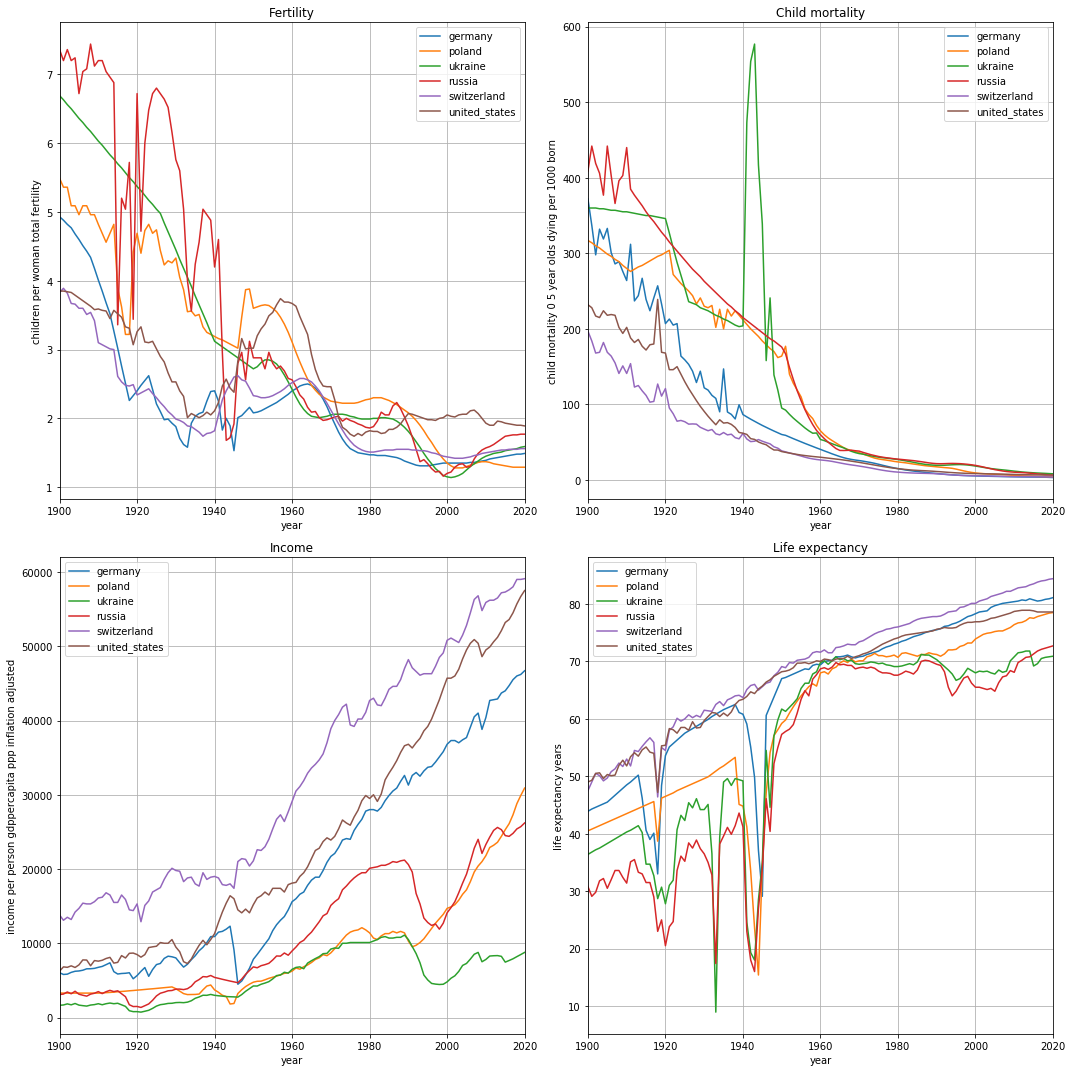

In [29]:
fig = plt.figure(figsize=(15,15))
for idx, (key, df) in enumerate(final_df.items()):
    ax = fig.add_subplot(2, 2, idx+1)
    df.plot(ax=ax)
    plt.grid(True)
    plt.ylabel(files[key].split('.')[0].replace('_', ' '))
    title = key[0].upper() + key[1:].replace('_', ' ')
    plt.title(title)
    
plt.tight_layout()

### Looking at the plots some conclusions can be drawn directly:

* The first (1914-1918) and second (1939-1945) World War had a severe impact on the fertility, child mortality and life expectancy.
* Even worse that World War II on life expectency was the so called [Holodomor](https://en.wikipedia.org/wiki/Holodomor) in 1932-1933 in the Soviet Union.
* The end of the soviet union decreased the income of the former soviet states to the level of the 1960s.
* The child moratlity data of Russia and Ukraine between 1915 and 1945 looks like extrapolated from a smaller amount of values. 


### Further Investigations

* Is there a correlation between `income` and `life_expectancy`?
* Is there a correlation between `child_mortality` and `fertility`?
* Which Country had the biggest relative increas in `income`?
* How have `fertility` rates changed between 1900 and 2000?

### Is there a correlation between income and life expectancy?

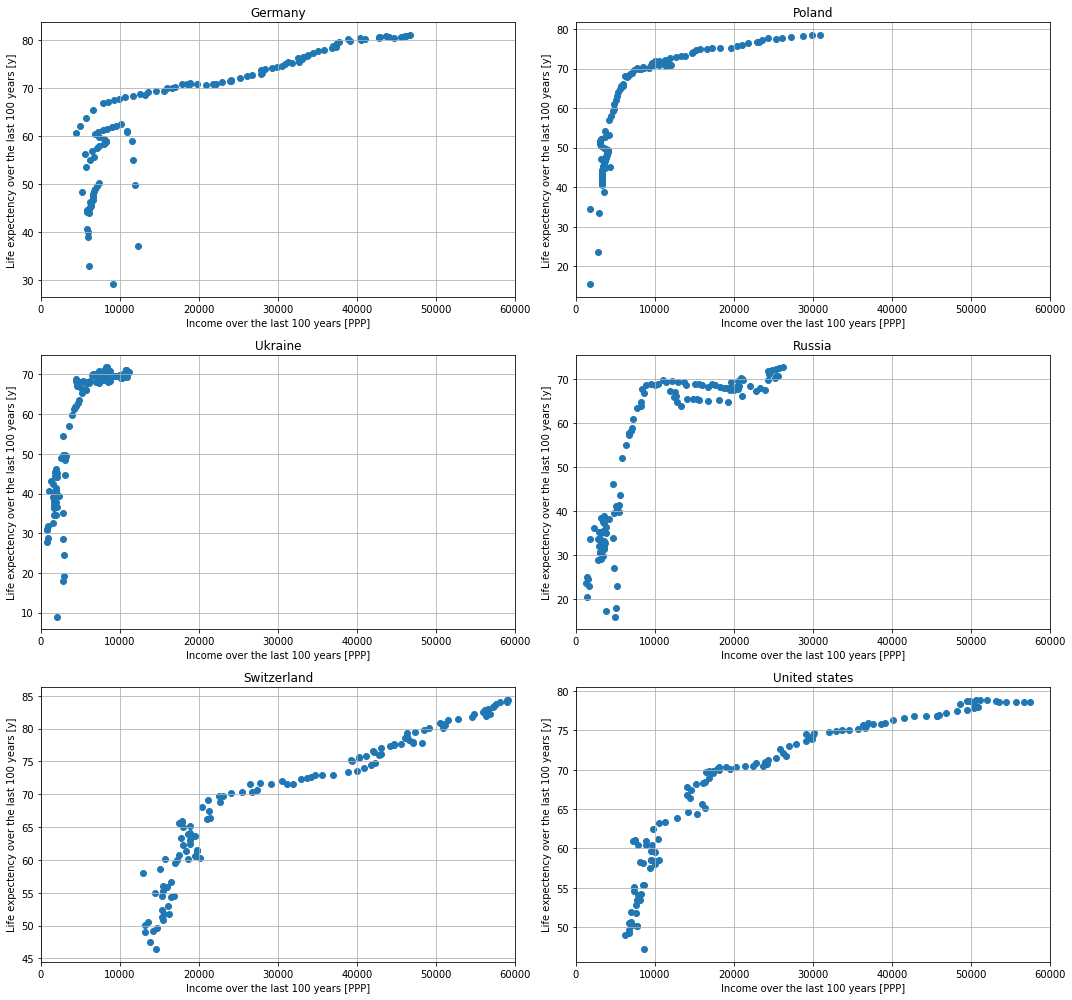

In [31]:
income_df = final_df['income']
life_df = final_df['life_expectancy']
fig = plt.figure(figsize=(15,14))
for idx, column in enumerate(income_df.columns):
    ax = fig.add_subplot(3, 2, idx+1)
    ax.scatter(income_df[column], life_df[column])
    title = column[0].upper() + column[1:].replace('_', ' ')
    ax.set_title(title)
    ax.set_ylabel('Life expectency over the last 100 years [y]')
    ax.set_xlabel('Income over the last 100 years [PPP]')
    ax.grid(True)
    ax.set_xlim((0, 60000))
    
plt.tight_layout()

### Correlations in life expectancy to income

There seems to be a quite a steep correlation in the lower incomes and a flat correlation in the higher income rates. The exception is Germany, which seems to not have a correlation in lower income to the life expectancy. 

* The lower incomes all originate from the beginning of the century, so there the are influence from worse available medicine and the World Wars.
* The correlations of income to life expectancy are not that strong in the former Soviet Union States.

### Is there a correlation between child_mortality and fertility?

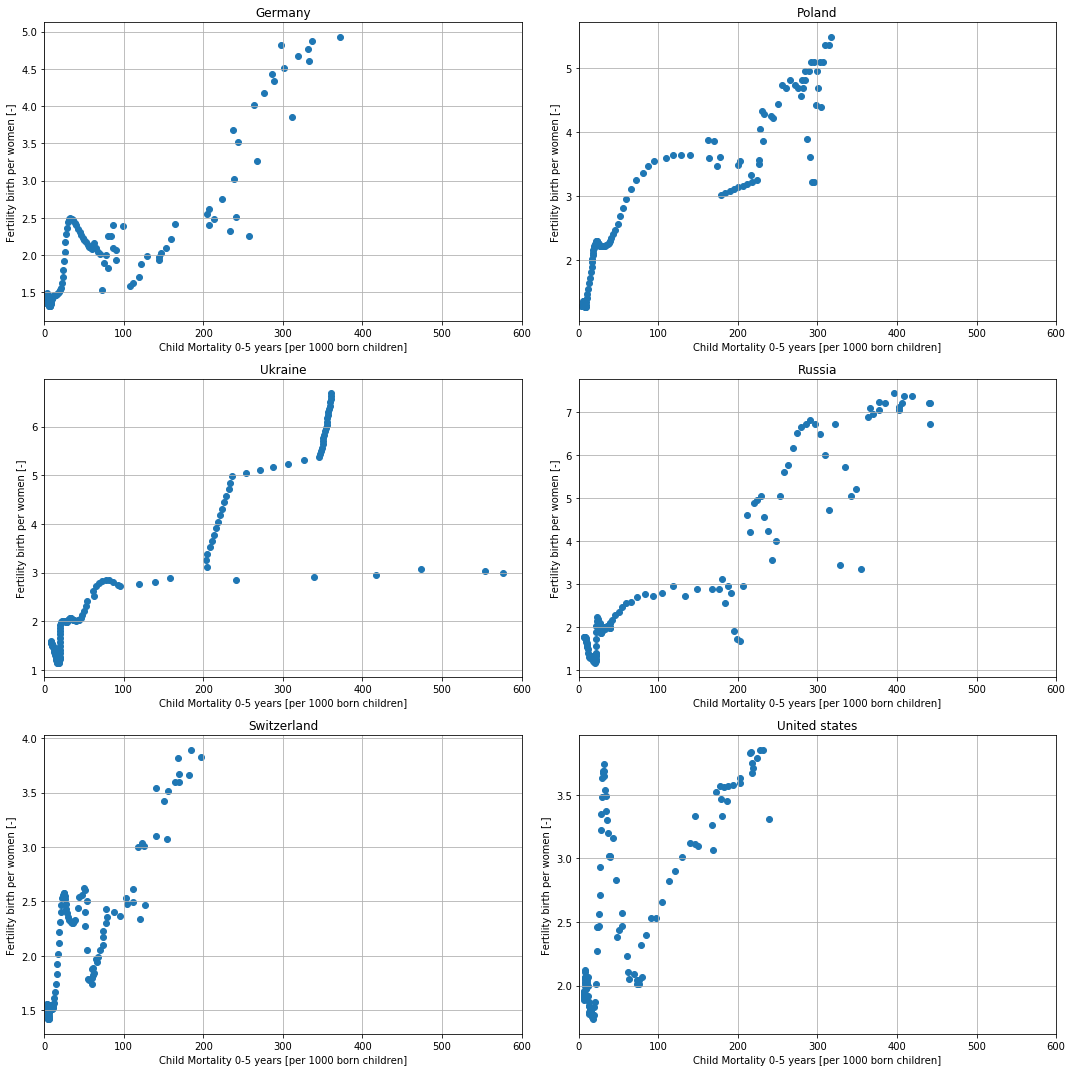

In [27]:
fertility_df = final_df['fertility']
mortality_df = final_df['child_mortality']
fig = plt.figure(figsize=(15,15))
for idx, column in enumerate(fertility_df.columns):
    ax = fig.add_subplot(3, 2, idx+1)
    ax.scatter(mortality_df[column], fertility_df[column])
    title = column[0].upper() + column[1:].replace('_', ' ')
    ax.set_title(title)
    ax.set_xlabel('Child Mortality 0-5 years [per 1000 born children]')
    ax.set_ylabel('Fertility birth per women [-]')
    ax.grid(True)
    ax.set_xlim((0, 600))
    
plt.tight_layout()

### Correlations in child mortality and fertility

There are correlations visible.

### Which Country had the biggest relative increase in income between 1900 and 2000?

To answer that question two bar chars with relative and absolute incomes are created. The bar colors represent the incomes in:

* 1900 the beginning of the last century
* 1969 the year of the Appollo 11 mission
* 1989 the end of the Soviet Union
* 2000 the end of the last millenium.

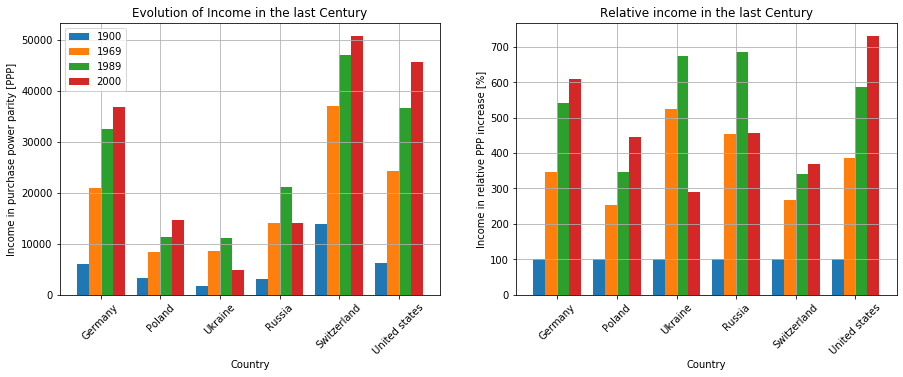

In [116]:
income_1900 = final_df['income'].loc[1900]
income_1969 = final_df['income'].loc[1969]
income_1989 = final_df['income'].loc[1989]
income_2000 = final_df['income'].loc[2000]
rel_income_1900 = income_1900 / income_1900 * 100
rel_income_1969 = income_1969 / income_1900 * 100
rel_income_1989 = income_1989 / income_1900 * 100
rel_income_2000 = income_2000 / income_1900 * 100

nice_strings = lambda x:  x[0].upper() + x[1:].replace('_', ' ')
xlabels = list(map(nice_strings, income_1900.index))
xticks = np.arange(len(xlabels))

_, ax = plt.subplots(1, 2, figsize=(15, 5));

ax[0].bar(xticks-0.3, income_1900.values, width=0.2, label='1900');
ax[0].bar(xticks-0.1, income_1969.values, width=0.2, label='1969');
ax[0].bar(xticks+0.1, income_1989.values, width=0.2, label='1989');
ax[0].bar(xticks+0.3, income_2000.values, width=0.2, label='2000');
ax[0].grid(True);
ax[0].legend(loc='upper left');
ax[0].set_xlabel('Country');
ax[0].set_ylabel('Income in purchase power parity [PPP]');
ax[0].set_xticks(xticks);
ax[0].set_xticklabels(xlabels, rotation=45);
ax[0].set_title('Evolution of Income in the last Century');

ax[1].bar(xticks-0.3, rel_income_1900.values, width=0.2, label='1900');
ax[1].bar(xticks-0.1, rel_income_1969.values, width=0.2, label='1969');
ax[1].bar(xticks+0.1, rel_income_1989.values, width=0.2, label='1989');
ax[1].bar(xticks+0.3, rel_income_2000.values, width=0.2, label='2000');
ax[1].grid(True);
ax[1].set_xlabel('Country');
ax[1].set_ylabel('Income in relative PPP increase [%]');
ax[1].set_xticks(xticks);
ax[1].set_xticklabels(xlabels, rotation=45);
ax[1].set_title('Relative income in the last Century');

### Conclusions on income between 1900 and 2000

* All countries have increased in purchase power parity per capita.
* Although Switzerland has the highest PPP per capita the biggest relative increase since 1900 is in the US.
* The relative PPP increas in the Soviet Union was the higher than in the US, but dropped to the end of the century. This is, because these countries weren't industrialized in 1900.

### How has `fertility` rates changed between 1900 and 2000?

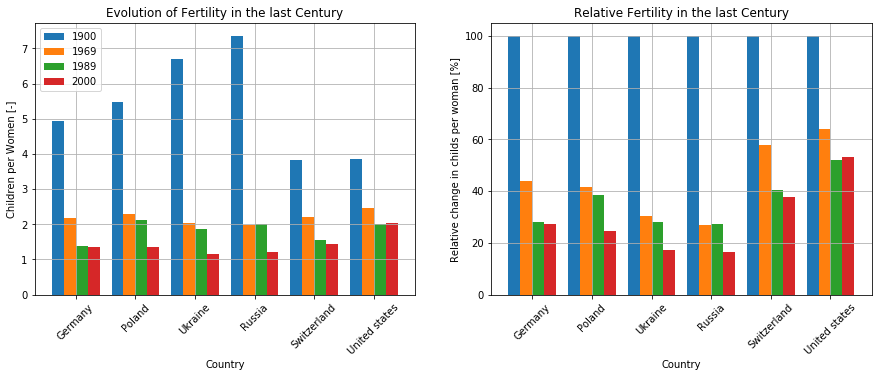

In [115]:
fertility_1900 = final_df['fertility'].loc[1900]
fertility_1969 = final_df['fertility'].loc[1969]
fertility_1989 = final_df['fertility'].loc[1989]
fertility_2000 = final_df['fertility'].loc[2000]
rel_fertility_1900 = fertility_1900 / fertility_1900 * 100
rel_fertility_1969 = fertility_1969 / fertility_1900 * 100
rel_fertility_1989 = fertility_1989 / fertility_1900 * 100
rel_fertility_2000 = fertility_2000 / fertility_1900 * 100

_, ax = plt.subplots(1, 2, figsize=(15, 5));

ax[0].bar(xticks-0.3, fertility_1900.values, width=0.2, label='1900');
ax[0].bar(xticks-0.1, fertility_1969.values, width=0.2, label='1969');
ax[0].bar(xticks+0.1, fertility_1989.values, width=0.2, label='1989');
ax[0].bar(xticks+0.3, fertility_2000.values, width=0.2, label='2000');
ax[0].grid(True);
ax[0].legend(loc='upper left');
ax[0].set_xlabel('Country');
ax[0].set_ylabel('Children per Women [-]');
ax[0].set_xticks(xticks);
ax[0].set_xticklabels(xlabels, rotation=45);
ax[0].set_title('Evolution of Fertility in the last Century');

ax[1].bar(xticks-0.3, rel_fertility_1900.values, width=0.2, label='1900');
ax[1].bar(xticks-0.1, rel_fertility_1969.values, width=0.2, label='1969');
ax[1].bar(xticks+0.1, rel_fertility_1989.values, width=0.2, label='1989');
ax[1].bar(xticks+0.3, rel_fertility_2000.values, width=0.2, label='2000');
ax[1].grid(True);
ax[1].set_xlabel('Country');
ax[1].set_ylabel('Relative change in childs per woman [%]');
ax[1].set_xticks(xticks);
ax[1].set_xticklabels(xlabels, rotation=45);
ax[1].set_title('Relative Fertility in the last Century');

### Conclusion on the women fertility rates

* All fertility rates dropped in the first half of the century

## Conclusion

